In [ ]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Internal imports

In [2]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# set equation colors
c_mf = "#14b7ccff"
c_ap_full = "#d65d17ff"
c_ex_full = "#57db2fff"
c_ap = "#6d2f0cff"
c_ex = "#296e13ff"

In [ ]:
# load data
df = pd.read_csv('exp6_vGM_SAND/time.csv', index_col=0)

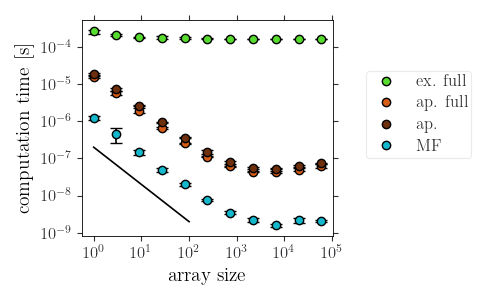

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

base = 3
x = np.array([base**i for i in range(len(df))])

ax.errorbar(x, df['mf mean'], df['mf std'], ls='None', marker='o', mfc=c_mf,
            ecolor='k', capsize=4, label='MODFLOW')
ax.errorbar(x, df['ap full mean'], df['ap full std'], ls='None', marker='o',
            mfc=c_ap_full, ecolor='k', capsize=4, label='approx. full')
ax.errorbar(x, df['ex full mean'], df['ex full std'], ls='None', marker='o',
            mfc=c_ex_full, ecolor='k', capsize=4, label='exact full')
ax.errorbar(x, df['ap mean'], df['ap std'], ls='None', marker='o', mfc=c_ap,
            ecolor='k', capsize=4, label='approx')
# ax.errorbar(x, df['ex mean'], df['ex std'], ls='None', marker='o', mfc=c_ex,
#             ecolor='k', capsize=4, label='exact')

x = np.logspace(0, 2, 2)
y = 2e-7 / x
ax.plot(x, y, c='k')

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='log', yscale='log')
ax.minorticks_off()

ax.set_xlabel('array size', labelpad=5)
ax.set_ylabel('computation time [s]', labelpad=5)
ax.set_xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5])


legend = [Line2D([0], [0], ls='None', marker='o', color=c_ex_full, label='ex. full'),
          Line2D([0], [0], ls='None', marker='o', color=c_ap_full, label='ap. full'),
          Line2D([0], [0], ls='None', marker='o', color=c_ap, label='ap.'),
          Line2D([0], [0], ls='None', marker='o', color=c_mf, label='MF')]
          

plt.legend(handles=legend, fontsize=12, loc='upper left', bbox_to_anchor=(1.1, 0.8))
plt.tight_layout()
#plt.savefig(output_path / 'time_complexity_vGM_SAND.pdf')